#Introduction to Regression with Neural Networks in Tensorflow

In [1]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


### Creating data to view and fit

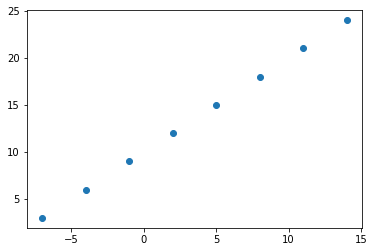

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
#Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [6]:
#Checking the shape of individual elements
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape, X[0].ndim, y[0].ndim

((), (), 0, 0)

they are empty because X[0] and y[0] are scalars. Scalars have 0 dimensions

In [7]:
#Turn our NumPy arrays into tensors with float 32
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape, X[0].ndim, y[0].ndim

(TensorShape([]), TensorShape([]), 0, 0)

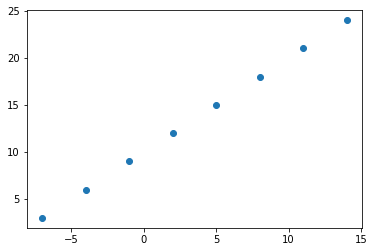

In [9]:
plt.scatter(X,y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layers
2. **Compiling a model** - define the loss function (it tells us how wrong we are) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X and y (features and labels). 

In [10]:
#Set random seed
tf.random.set_seed(42)

# 1.Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is the mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model.

1. **create a model** - here we might add more layers, inc num of hidden layers, change activation function of each layer.

2. **compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting the model** - here we might fit a model for more **epochs** or on more data

In [14]:
#Let's rebuild our model - Trial 1

# 1.Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is the mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3.Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 587ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [15]:
#Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
#Let's see if our model's prediction has improved

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
#Let's rebuild our model - Trial 2

# 1.Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is the mean absolute error
              optimizer = tf.keras.optimizers.Adam(), #(this time we'll change the optimizer to Adam)
              metrics = ["mae"])

# 3.Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 441ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================] - 0s 8

It's not better than our model

In [18]:
#Let's rebuild our model - Trial 3

# 1.Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # this time we'll increase the no of neurons to 100 and use activation function relu
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is the mean absolute error
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

# 3.Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 447ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0s 19ms

In [19]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Let's try to make a prediction
model.predict([17.0])

array([[31.727652]], dtype=float32)

Although, the training error is pretty low, the model is not that accurate on new data. So the model might be overfitting

In [21]:
#Let's rebuild our model - Trial 3

# 1.Create a model with Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, #mae is the mean absolute error
              optimizer = tf.keras.optimizers.Adam(lr=0.01), # this time we are increasing the learning rate
              metrics = ["mae"])

# 3.Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 285ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8820 - mae: 6.8820
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 6.709

In [22]:
#Let's try to make a prediction
model.predict([17.0])

array([[27.325064]], dtype=float32)

This is our best model so far!!

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation..the most important thing is visualization

* The data - what data are we working with? What does it look like
* The model - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictors of the model - how do the predictions vary with the ground truth

In [23]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

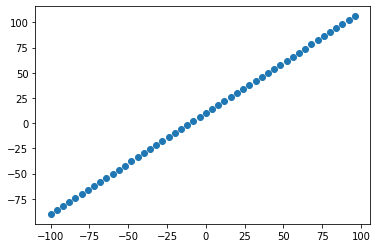

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The three sets

* Training set - the model learns from this data, which is typically 70-80% of the data
* Validation set - the model gets tuned on this data, which is typically 10-15%
* Test set - The model gets evaluated on this data to test what it has learned. Typically 10-15%

In [26]:
#Check the length of how many samples we have
len(X)


50

In [27]:
# Split the data into train and test
X_train = X[:40] # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples(20%)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing data

Now we've got our data in training and test sets..let's visualize it again!

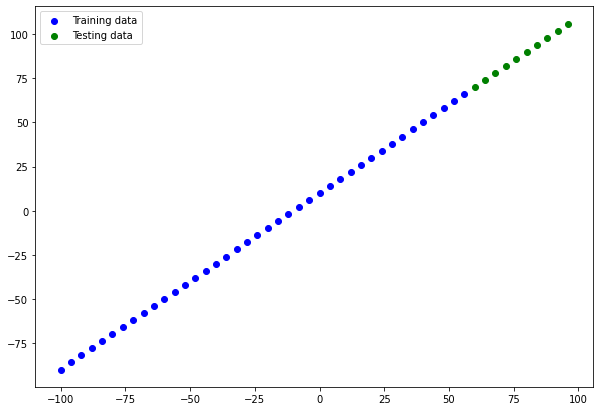

In [28]:
plt.figure(figsize=(10,7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

#Plot testing data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")

plt.legend()

In [29]:
# Let's have a look at how to build a neural network for our data

# 1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

# 3.Fit the model
#model.fit(tf.expand_dims(X_train,y_train axis=-1),y, epochs = 100)

In [30]:
model.summary()

ValueError: ignored

In [31]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [32]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])


In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters(patterns) the model can update as it trains.
* Non Trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from the other models during **transfer learning**).

📖 Resource: https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini

Exercise : Try playing around with no of hidden units and see how it changes the number of parameters.

In [34]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Let's fit our model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


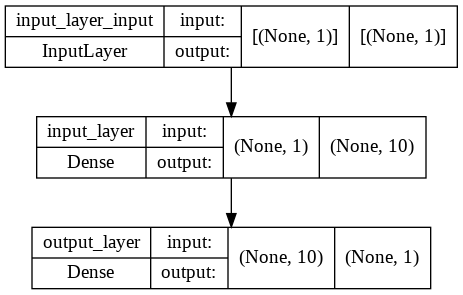

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

Plotting y_test or y_true versus y_pred (ground truth versus your model) 

In [38]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** If you feel like you're going to reuse some functionality, it's good to turn it into a function

In [40]:
#Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")

  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  plt.legend()

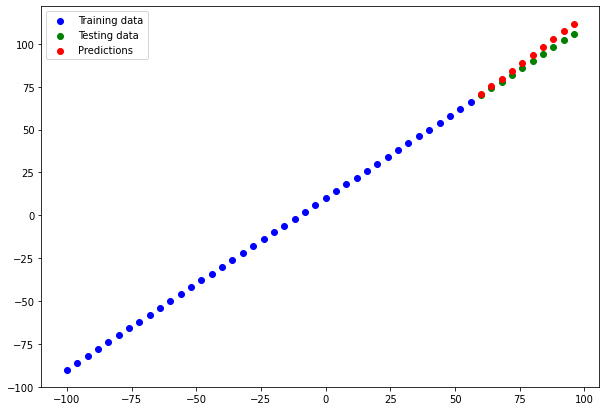

In [41]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, therer are different wvaluation metrics

Since we're working on regression model, therer are 2 main metrics:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Huber - Combination of MSE and MAE, less sensitive to outliers than MSE

In [42]:
#Evaluate the model on test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 122ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [43]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [44]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

y_pred and Y_test have different shapes, that is the reason the MAE function returned an array instead of a single integer. To get rid of the extra 1 dimension, use squeeze method on y_pred.

In [47]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [48]:
#Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [49]:
# make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))

### Running Experiments to imporve our model

1. Get more data - get more examples for your model to train on.
2. Make your model larger (using a more comlex layer) - this might come in form of more layers or more hidden units.
3. Train for longer - give your model more of a chance to find the patterns in data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model 3` - 2 layers, trained for 500 epochs.

Build `model 1`

In [50]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3.Fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

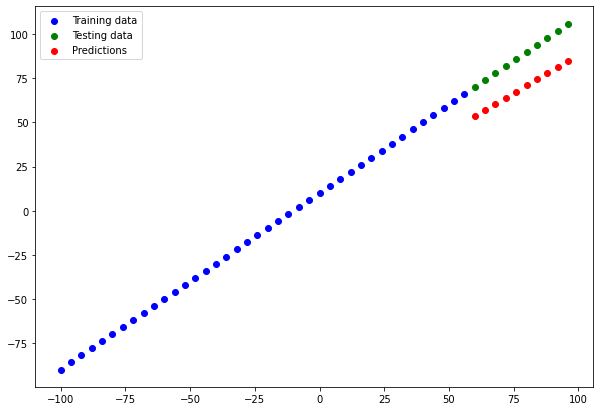

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build model_2**
* 2 FC layers trained for 100 epochs

In [53]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3.Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 6ms/

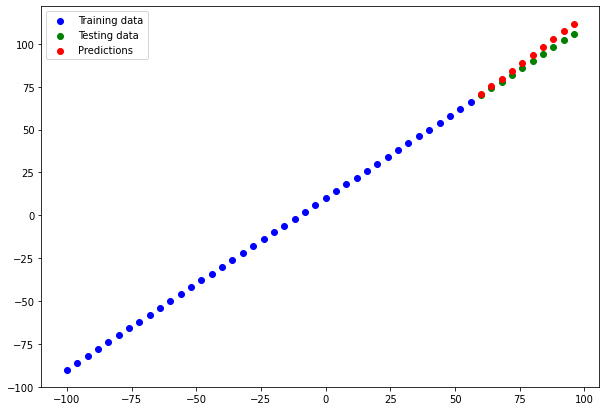

In [54]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build model 3**
* 2 layers, trained for 500 epochs

In [56]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3.Fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 6ms/

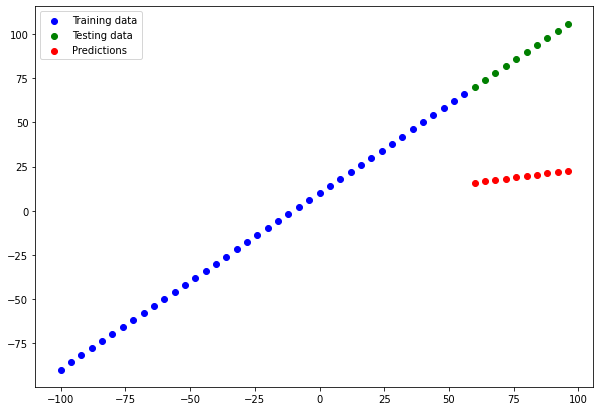

In [57]:
# Make and plot predictions for model_1
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
#Calculate model_1 evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

**Note:** You want to start with small experiments and make sure they work and then increase the scale if needed

## Comparing the results of our experiments

In [59]:
 import pandas as pd

 model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


Looks like `model_2` performed the best...

In [60]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.

It can be tediuos when running lots of experiments.

Luckily there are tools to help us!

**Resources:** 
* Tensorboard
* Weights and biases

**Note** One of the main goals should be to minimize the time btwn your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, getting closer to figure out what does work.

## Saving our models

Saving our models allows us to use them out of colab.

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 format

In [61]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [62]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [63]:
#Load in the savedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Compare model 2 predictions with SavedModel predictions to see if they are same
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
# Compare the MAE of model_2_preds and loaded_saveModel_preds
mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds) == mae(y_true = y_test, y_pred = model_2_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [67]:
#Load in a model using the .h5 best_model_HDF5_format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Compare model 2 predictions with .h5 predictions to see if they are same
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from Google Colab

If you want to download your files from google colab
1. files -> options on file -> download
2. Use code (see the cell below)
3. Save it to Google drive (see the second cell below)

In [69]:
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# Save a file from google colab to google drive (requires mounting Google Drive)

!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [71]:
!ls /content/drive/MyDrive/tensorflow_course

/content/drive/MyDrive/tensorflow_course


## A larger example

In [72]:
#Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
#Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
#Let's try one- hot encoding on our dataset so that its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [76]:
#View X
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [77]:
#view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [78]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [79]:
#Build a neural network (sort of like model 2 above)
tf.random.set_seed(42)

# 1.Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3.Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [80]:
# Check the results of the insurance model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [81]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well....let's try to improve it

To (try) improve our model, we'll run 2 experiments:
1. Add and extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. (insert your own experiment here)

In [82]:
#Set random seed
tf.random.set_seed(42)

# 1.Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3.Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [83]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [84]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [88]:
#Set random seed
tf.random.set_seed(42)

# 1.Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3.Fit the model
history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [89]:
#Evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

In [90]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0, 0.5, 'epochs')

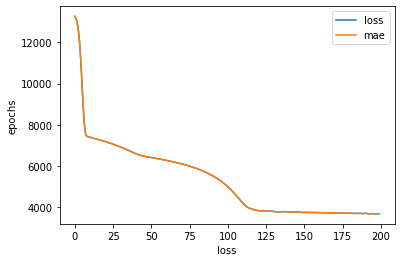

In [91]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

**Question** How long should you train for?

It depends. Really... it depends on the problem you're working on. However Tensorflow has a solution! It's called the EarlyStopping Callback, which is a tf component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks use Normalization. If you aren't sure which one to use, use both and compare the performance of both.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [100]:
#Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow few classes from scikitlearn

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create x and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the col transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalized(MINMAXSCALER) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [103]:
#What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [108]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Lets build a neural network on normalized data

In [114]:
#build neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )

# 3.Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [115]:
#Evaluate our insurance model
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5779 - mae: 3171.5779


[3171.577880859375, 3171.577880859375]